<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#1.-Reading-the-files" data-toc-modified-id="1.-Reading-the-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Reading the files</a></span></li><li><span><a href="#Primary-data-analysis-/-Primary-visual-data-analysis" data-toc-modified-id="Primary-data-analysis-/-Primary-visual-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Primary data analysis / Primary visual data analysis</a></span></li><li><span><a href="#&quot;estimated-cost&quot;" data-toc-modified-id="&quot;estimated-cost&quot;-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>"estimated cost"</a></span></li><li><span><a href="#Creating,-Training,-Evaluating,-Validating,-and-Testing-ML-Models" data-toc-modified-id="Creating,-Training,-Evaluating,-Validating,-and-Testing-ML-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating, Training, Evaluating, Validating, and Testing ML Models</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#Creating-a-Validation-set" data-toc-modified-id="Creating-a-Validation-set-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Creating a Validation set</a></span></li><li><span><a href="#8-Cross-validation-and-adjustment-of-model-hyperparameters" data-toc-modified-id="8-Cross-validation-and-adjustment-of-model-hyperparameters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>8 Cross-validation and adjustment of model hyperparameters</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import os

# Introduction

This data set pertains to all types of structural permits. Data includes details on application/permit numbers, job addresses, supervisorial districts, and the current status of the applications. Data is uploaded weekly by DBI. Users can access permit information online through DBI’s Permit Tracking System which is 24/7 at www.sfdbi.org/dbipts.

Note if you need to open permits in Excel, use one of the pre-filtered datasets:

1. Building Permits on or after January 1, 2013 https://data.sfgov.org/d/p4e4-a5a7
2. Building Permits before January 1, 2013 https://data.sfgov.org/d/4jpb-z4kk

# 1. Reading the files
The dataset provided is in a .csv format. This is a structured dataset, with columns representing a range of things. For dealing with structured data, pandas is the most important library. We already imported pandas as pd when we used the import* command earlier. We will now use the read_csv function of pandas to read the data:

In [133]:
# create new df
df = pd.read_csv(r'../SanFrancisco-BuildingPermitsData/data/Building_Permits_on_or_after_January_1__2013.csv')

C:\Users\Arthur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,22,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [134]:
df.sample(3)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
29117,201310290488,8,otc alterations permit,10/29/2013,3725,078,981,NaN,Mission,St,NaN,NaN,"install hvac syste, 4 sets of roof top units",complete,07/23/2015,10/29/2013,10/30/2013,07/23/2015,NaN,NaN,1.0,1.0,NaN,NaN,10/14/2016,130000.0,130000.0,office,0.0,office,0.0,2.0,NaN,3.0,constr type 3,3,constr type 3,NaN,6.0,South of Market,94103.0,POINT (-122.40788325435065 37.78114644553484),1322368389120
104832,201510260717,8,otc alterations permit,10/26/2015,0311,008,88,NaN,Kearny,St,NaN,NaN,16th floor: (e) ti include selective demo of n...,issued,10/26/2015,10/26/2015,10/26/2015,NaN,NaN,NaN,21.0,21.0,NaN,NaN,10/20/2016,14038.0,14038.0,office,NaN,office,NaN,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,POINT (-122.40334146136752 37.78859990589264),1400661495355
131364,201606281013,8,otc alterations permit,06/28/2016,0238,001,275,NaN,Battery,St,NaN,NaN,"fire alarm work for the floor 9, suite 900. ad...",complete,08/29/2016,06/28/2016,06/28/2016,08/29/2016,NaN,NaN,32.0,32.0,NaN,Y,06/23/2017,5490.0,5490.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,POINT (-122.40037373645126 37.79386286989569),142818363386


Let us look at the first few rows of the data. Since the dataset is large, this command does not show us the complete column-wise data. To fix this, we will define the following function, where we set max.rows and max.columns to 100.

In [4]:
# action in order to reduice dataset for 100 columns and rows to perform faster calcul
pd.set_option('display.max_columns',100)
df.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201301027052,7,wall or painted sign,01/02/2013,1446,024,5000,NaN,Geary,Bl,NaN,NaN,vinyl lettering on awning and windows,complete,01/25/2013,01/02/2013,01/02/2013,01/25/2013,NaN,NaN,NaN,NaN,NaN,NaN,12/28/2013,286.0,286.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Outer Richmond,94118.0,POINT (-122.47316095095957 37.78085657756962),1292126100033


Let's change the names of our columns so that it can be more convenient to work with them. Translate to lowercase and remove characters from names

In [5]:
# translate to lowercase
df.columns = map(str.lower, df.columns)
# remove characters from names
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('-', '') for c in df.columns]
df.head(1)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id
0,201301027052,7,wall or painted sign,01/02/2013,1446,024,5000,NaN,Geary,Bl,NaN,NaN,vinyl lettering on awning and windows,complete,01/25/2013,01/02/2013,01/02/2013,01/25/2013,NaN,NaN,NaN,NaN,NaN,NaN,12/28/2013,286.0,286.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Outer Richmond,94118.0,POINT (-122.47316095095957 37.78085657756962),1292126100033


<AxesSubplot:>

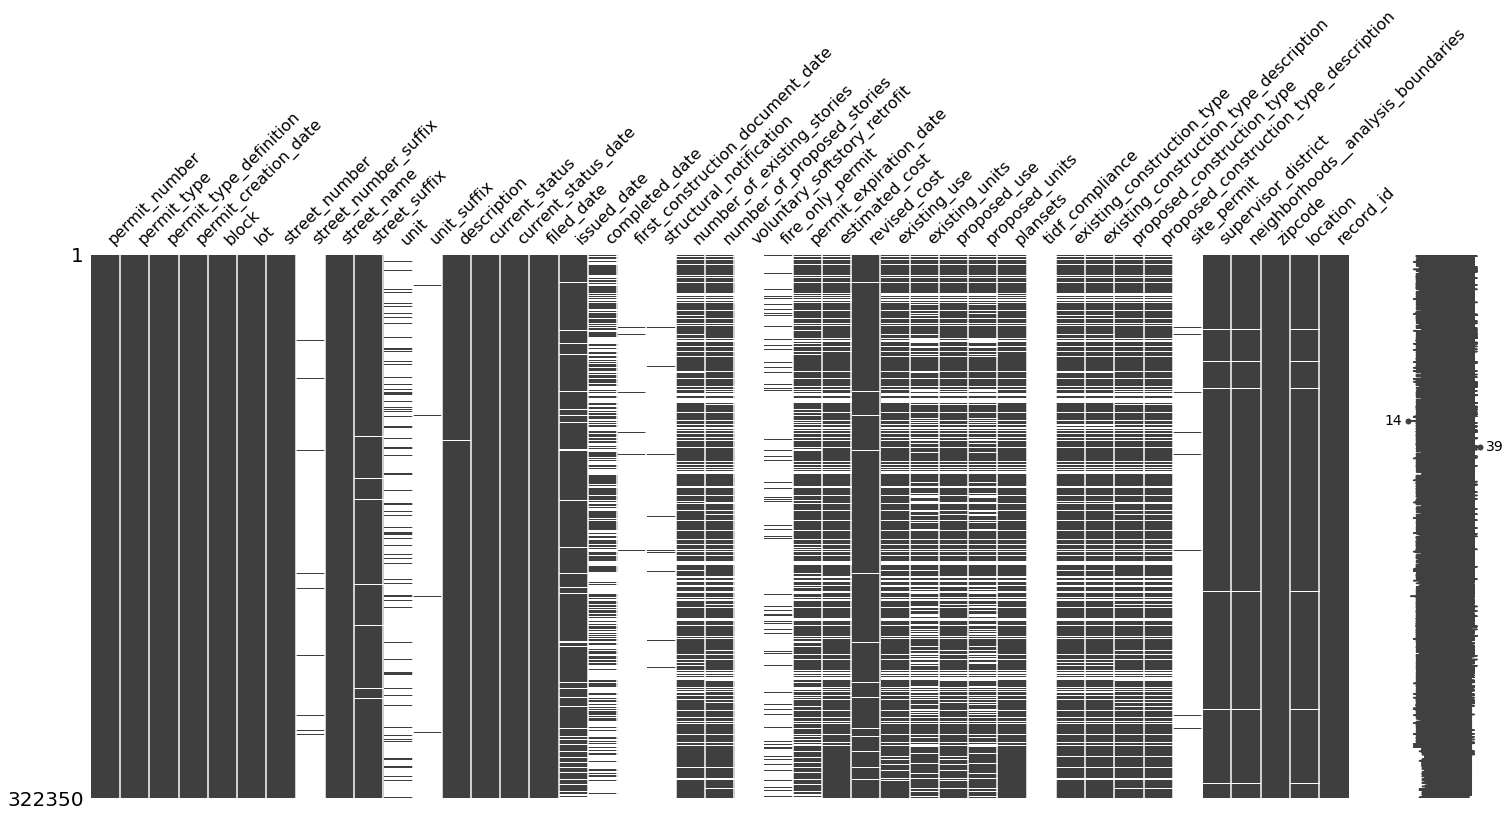

In [6]:
# to check where values are missing
import missingno as msno
msno.matrix(df)

Now with the help of the library missingno we visualize empty values in our dataset. White passes are missing data in our dataset.

**Visualising missing values for a sample of 250**


<AxesSubplot:>

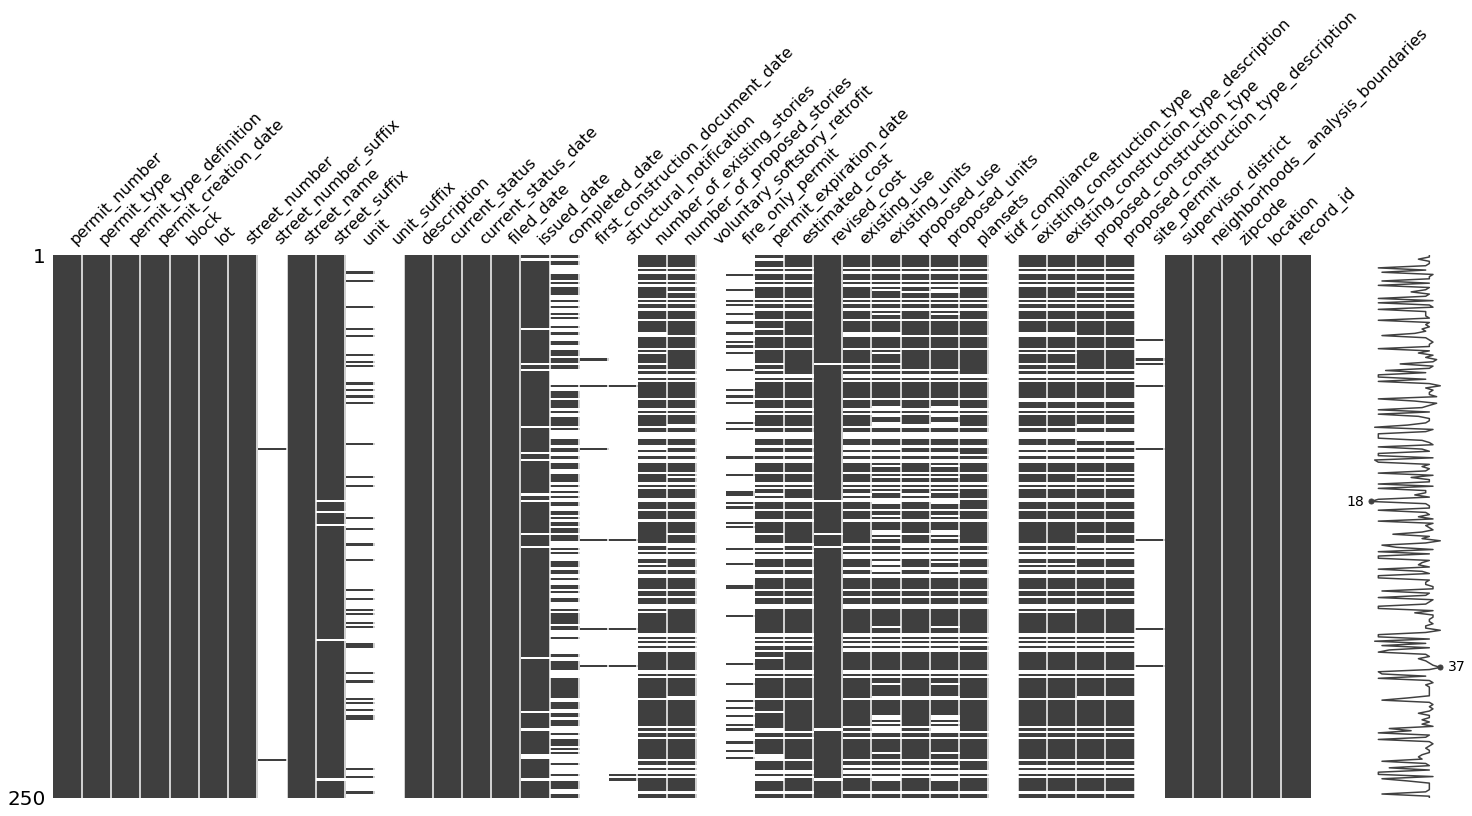

In [7]:
# check empty values for a sample of 250 rows
import missingno as mso
msno.matrix(df.sample(250))

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another
* **msno.bar** is a simple visualization of nullity by column:

<AxesSubplot:>

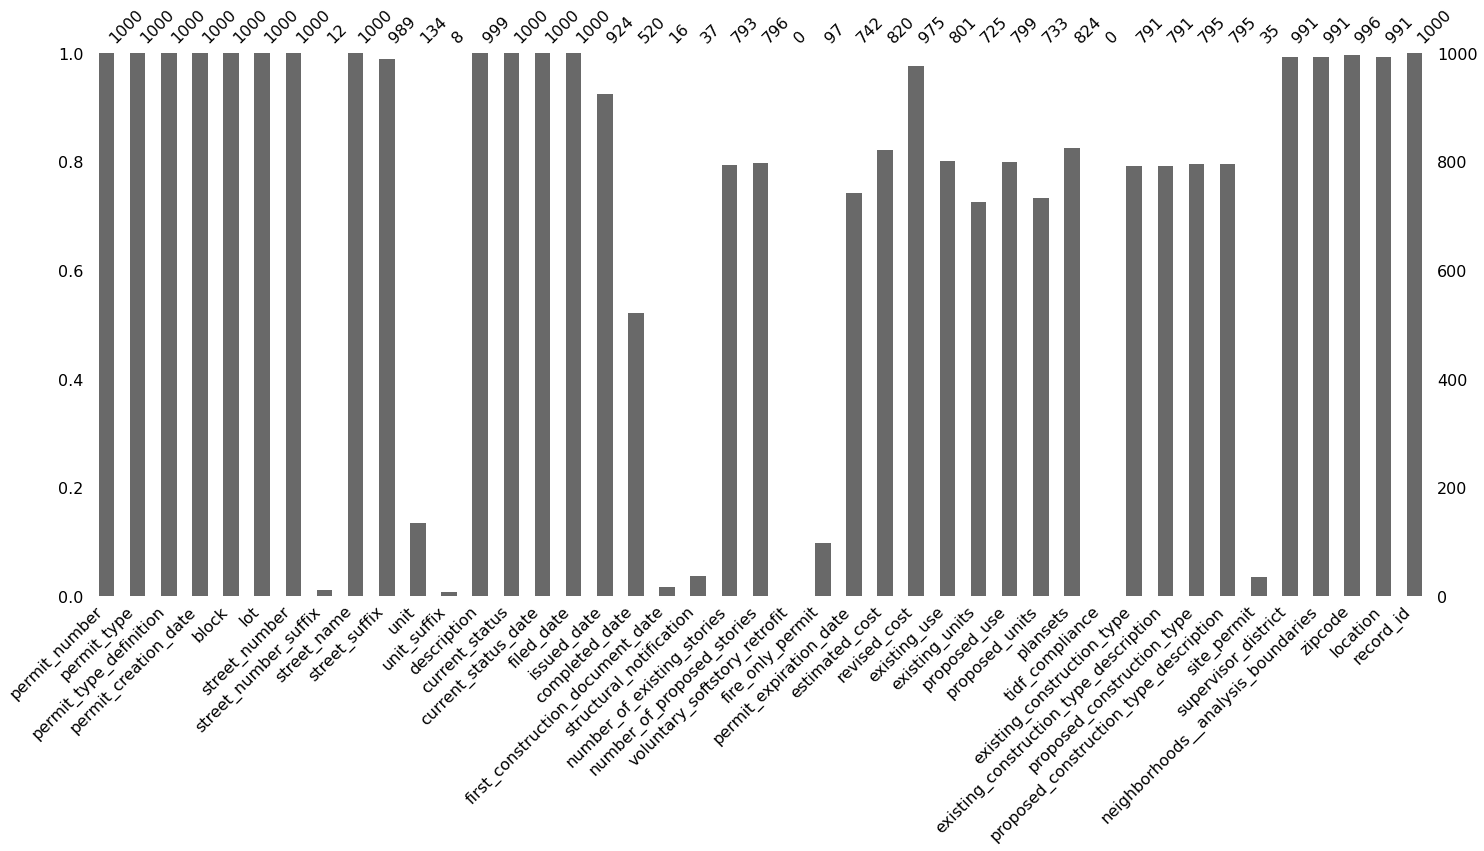

In [8]:
msno.bar(df.sample(1000))

<AxesSubplot:>

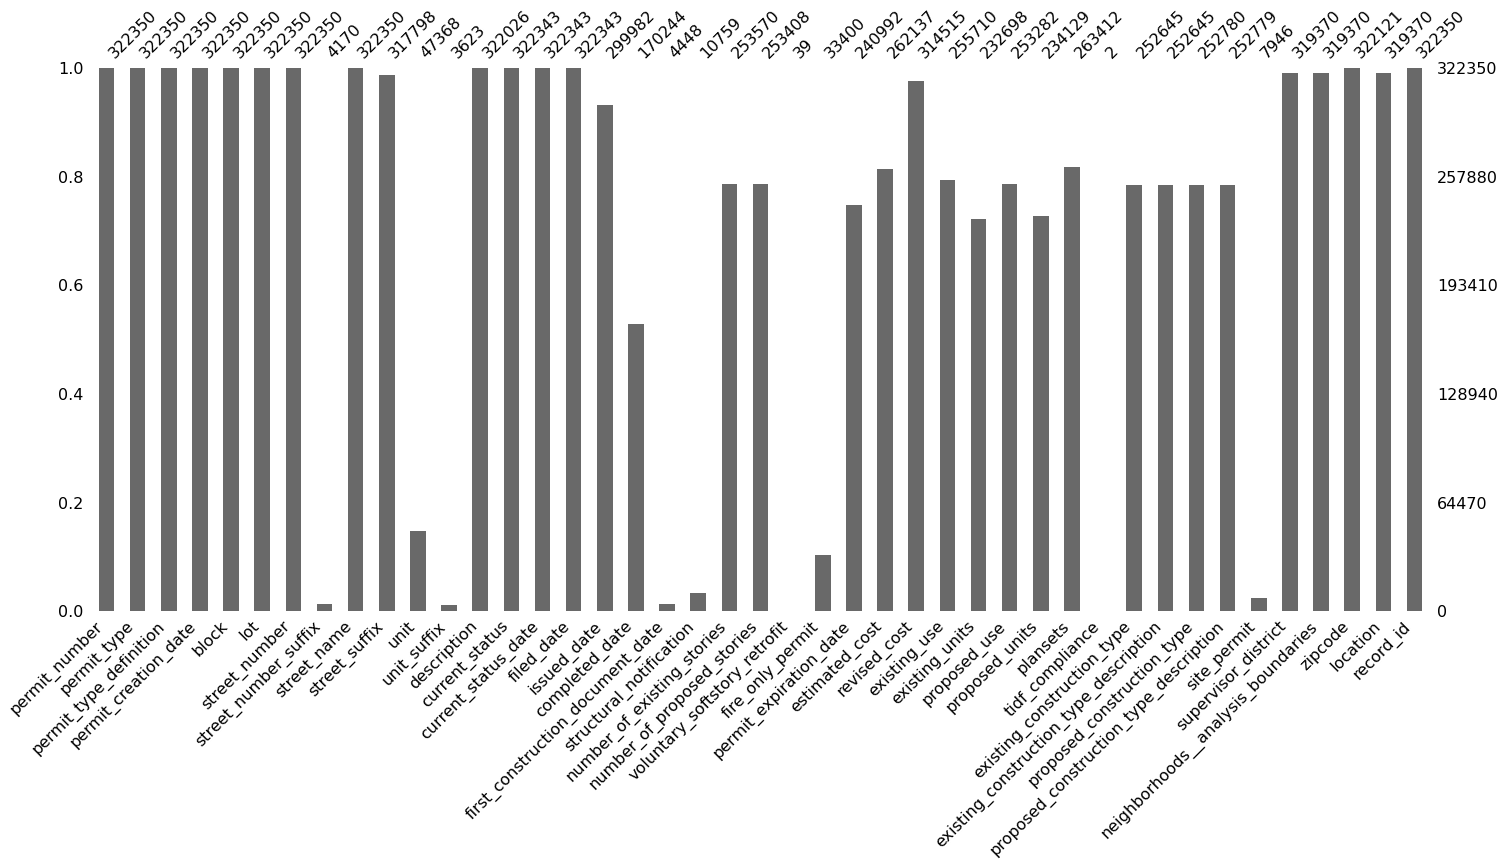

In [9]:
msno.bar(df)

<AxesSubplot:>

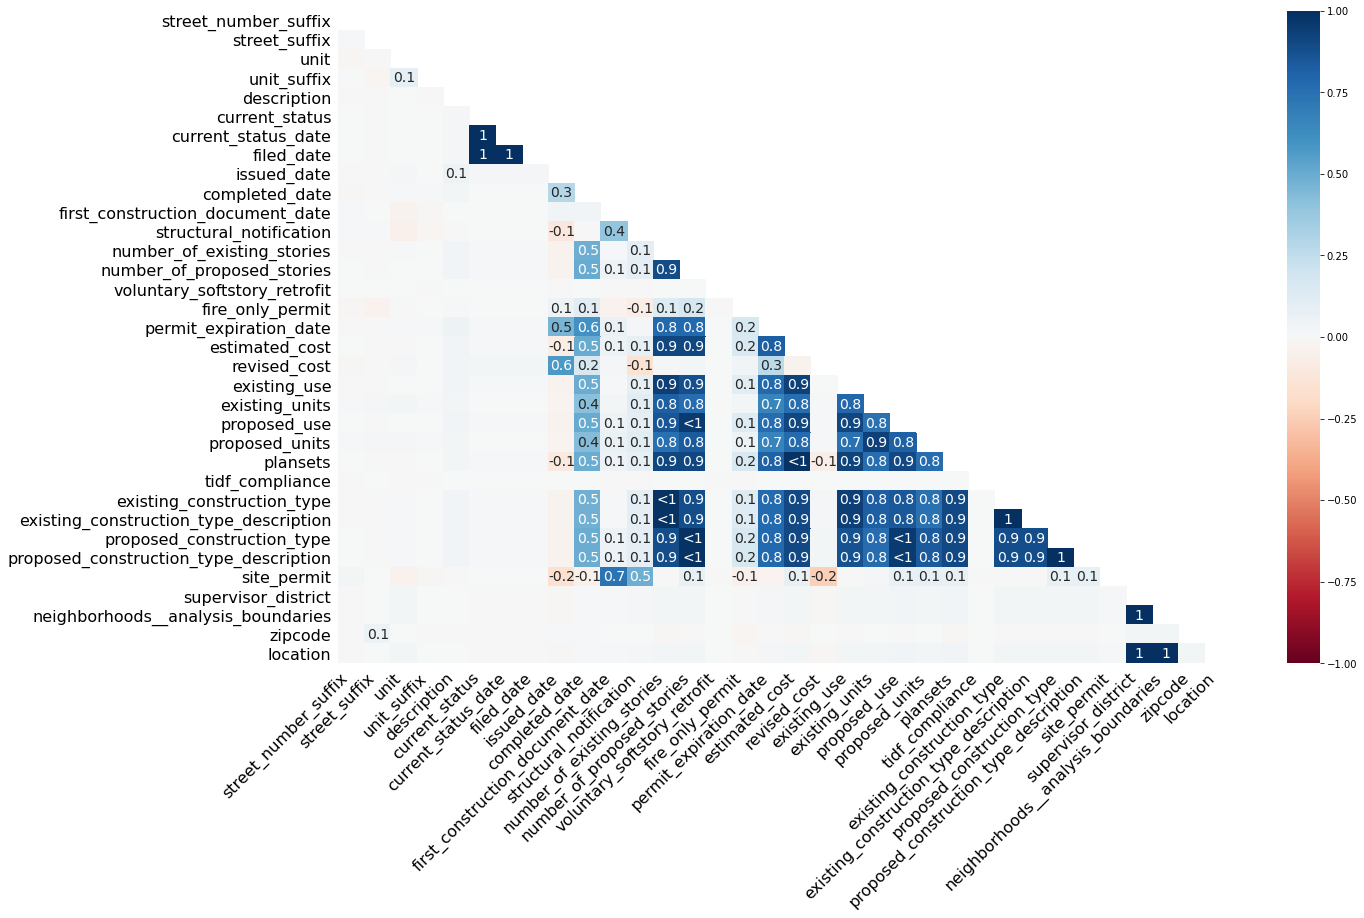

In [10]:
# heatmap with correlation color code 
msno.heatmap(df)

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between 'exiting_use' and ' is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

In [11]:
df.columns

Index(['permit_number', 'permit_type', 'permit_type_definition',
       'permit_creation_date', 'block', 'lot', 'street_number',
       'street_number_suffix', 'street_name', 'street_suffix', 'unit',
       'unit_suffix', 'description', 'current_status', 'current_status_date',
       'filed_date', 'issued_date', 'completed_date',
       'first_construction_document_date', 'structural_notification',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'voluntary_softstory_retrofit', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'tidf_compliance', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'site_permit',
       'supervisor_district', 'neighborhoods__analysis_boundaries', 'zipcode',
       'location', 'record_id'],
      d

**Dendrogram** allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<AxesSubplot:>

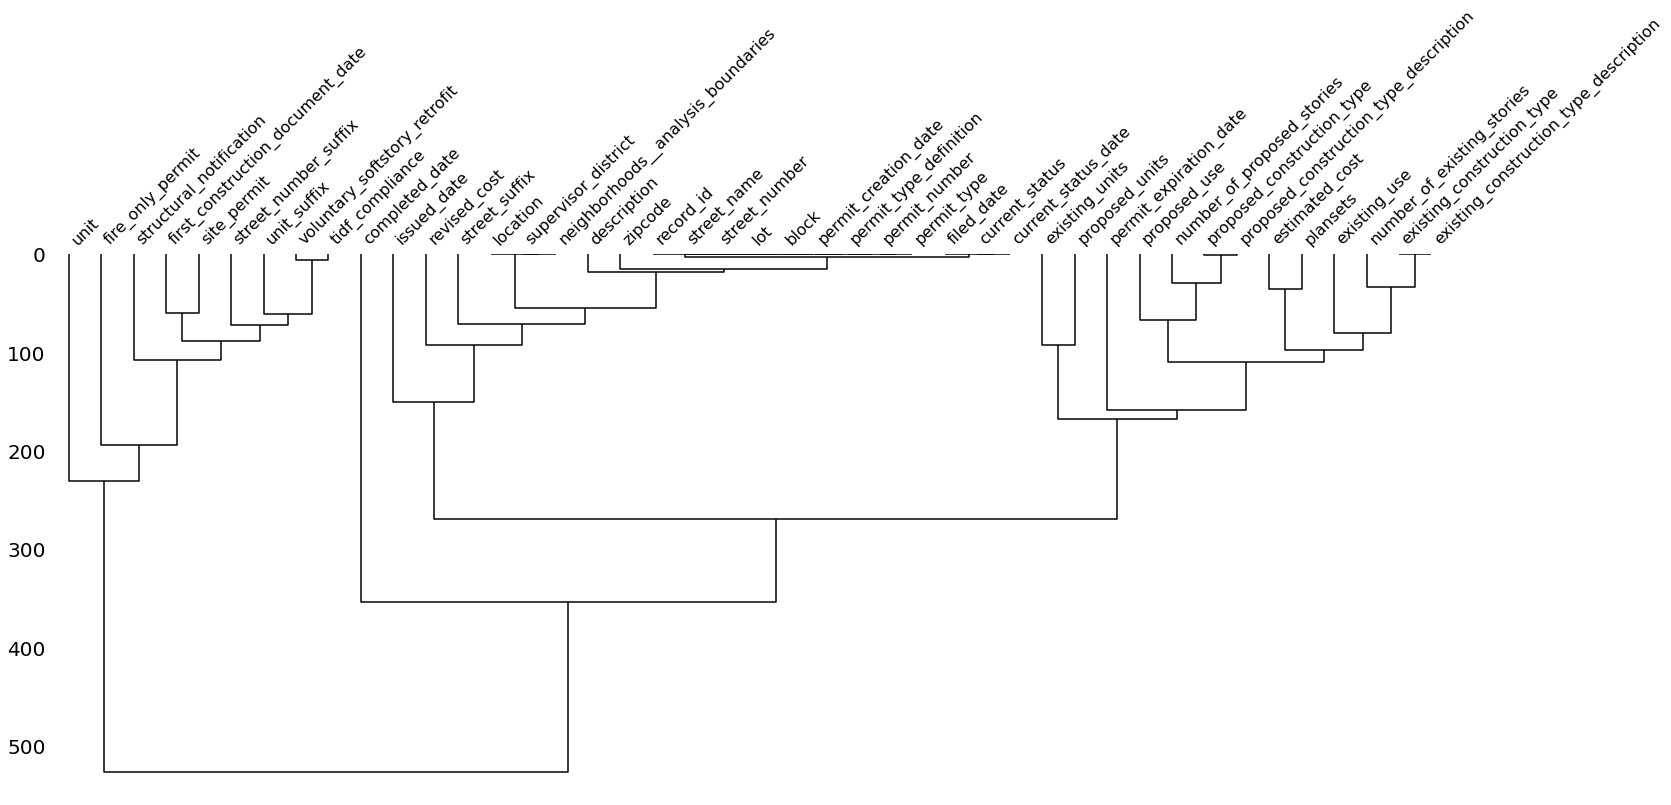

In [12]:
msno.dendrogram(df)

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

In [13]:
# delete columns with a name delet_
df.drop(df.filter(regex='delete').columns, axis=1, inplace=True)
df.head(5)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id
0,201301027052,7,wall or painted sign,01/02/2013,1446,024,5000,NaN,Geary,Bl,NaN,NaN,vinyl lettering on awning and windows,complete,01/25/2013,01/02/2013,01/02/2013,01/25/2013,NaN,NaN,NaN,NaN,NaN,NaN,12/28/2013,286.0,286.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Outer Richmond,94118.0,POINT (-122.47316095095957 37.78085657756962),1292126100033
1,201301027060,8,otc alterations permit,01/02/2013,3740,034,221,NaN,Main,St,NaN,NaN,4th floor:demo of corridor and elevator lobby ...,complete,08/23/2013,01/02/2013,02/07/2013,08/23/2013,NaN,NaN,16.0,16.0,NaN,NaN,01/23/2016,180000.0,180000.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,POINT (-122.39223991655416 37.79034659835155),1292138165681
2,201301027061,8,otc alterations permit,01/02/2013,0467A,046,180,NaN,Mallorca,Wy,NaN,NaN,"unit #206: demo old kitchen cabinets, install...",complete,02/20/2013,01/02/2013,01/02/2013,02/20/2013,NaN,NaN,3.0,3.0,NaN,NaN,12/28/2013,8000.0,9200.0,apartments,24.0,apartments,24.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,2.0,Marina,94123.0,POINT (-122.43763620022534 37.80255583790171),1292135234367
3,201301027063,8,otc alterations permit,01/02/2013,3740,034,221,NaN,Main,St,NaN,NaN,2nd floor:demo of corridor and elevator lobby ...,complete,08/23/2013,01/02/2013,02/07/2013,08/23/2013,NaN,NaN,16.0,16.0,NaN,NaN,02/02/2014,75000.0,75000.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,POINT (-122.39223991655416 37.79034659835155),1292140165681
4,201301027064,8,otc alterations permit,01/02/2013,3721,120,555,NaN,Mission,St,0.0,NaN,tenant improvement on a new multi-tenant floor...,complete,04/01/2013,01/02/2013,01/08/2013,04/01/2013,NaN,NaN,34.0,34.0,NaN,NaN,01/03/2014,75000.0,75000.0,office,NaN,office,NaN,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,POINT (-122.39863917066845 37.78844687010852),1292139394511


Let's look at the number of unique values in each column.

In [14]:
df.nunique()

permit_number                             294743
permit_type                                    8
permit_type_definition                         8
permit_creation_date                        2250
block                                       4992
lot                                         1244
street_number                               5340
street_number_suffix                          18
street_name                                 1783
street_suffix                                 21
unit                                         830
unit_suffix                                  200
description                               219138
current_status                                18
current_status_date                         2309
filed_date                                  2251
issued_date                                 2249
completed_date                              2237
first_construction_document_date            1577
structural_notification                        1
number_of_existing_s

# Primary data analysis / Primary visual data analysis

* We select all the "estimated cost" and "revised_cost" values by the time the order was created.
* Using the to_datetime function, we translate the string values in the date column into a time format.

In [15]:
data_loc = df.loc[:,['estimated_cost','revised_cost','permit_creation_date']]
data_cost = data_loc
data_cost.permit_creation_date = pd.to_datetime(data_cost.permit_creation_date)
data_cost = data_cost.set_index('permit_creation_date')

* Using the dropna function, we delete all empty values, thus deleting all lines that will contain some kind of empty value in one of the parameters.
* And using the groupby function, we group all our data by month. In this case, the value in other columns will be summarized. 


In [16]:
data_cost = data_cost.dropna()
data_cost

,estimated_cost,revised_cost
permit_creation_date,,
2013-01-02,286.0,286.0
2013-01-02,180000.0,180000.0
2013-01-02,8000.0,9200.0
2013-01-02,75000.0,75000.0
2013-01-02,75000.0,75000.0
...,...,...
2021-10-08,15000.0,0.0
2021-10-08,2000.0,0.0
2021-10-08,3795.0,3795.0


In [17]:
data_cost_m = data_cost.groupby(pd.Grouper(freq='M')).sum()
data_cost_m.head()

,estimated_cost,revised_cost
permit_creation_date,,
2013-01-31,1.965663e+08,2.370208e+08
2013-02-28,9.769149e+07,1.238380e+08
2013-03-31,4.397603e+08,5.342316e+08
2013-04-30,2.656338e+08,2.916472e+08
2013-05-31,3.598151e+08,5.426611e+08


Now let's create a new chart, where on the X axis we will have the month of creating the order, and on the Y axis - the "estimated cost". We see here a slight cyclicality and a general tendency towards a decline in the total number of requests for construction.


<AxesSubplot:title={'center':'Estimated costs and revised costs in 2013-2020'}, xlabel='permit_creation_date'>

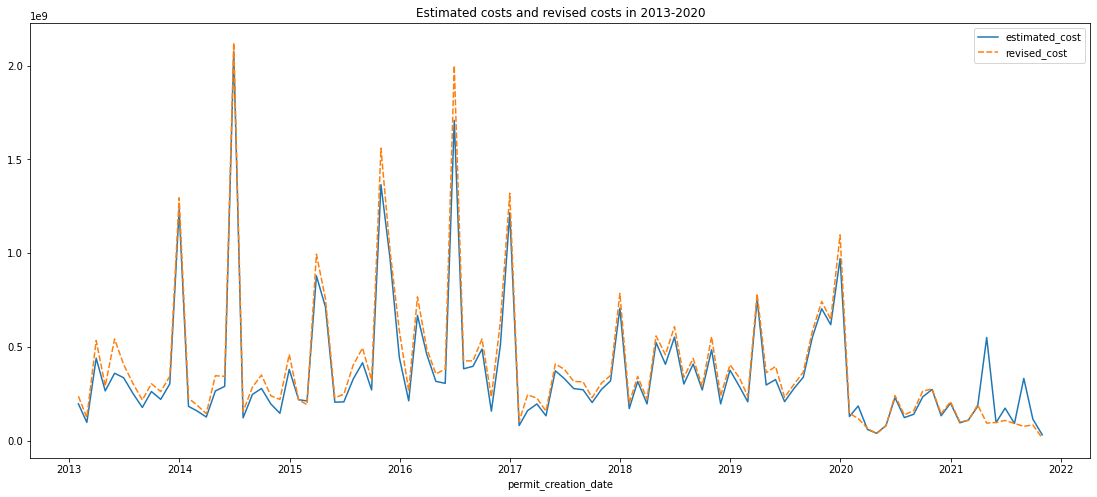

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
# Add title
plt.title("Estimated costs and revised costs in 2013-2020")
sns.lineplot(data=data_cost_m)

Let's make the graph more visual and now group these same data by year. Here we will use the groupby function again, only as an argument to the function we will have not a month, but a year. And as before, the values ​​in the output columns during grouping will be summarized.

Here you can already notice the general trend and we see that the total number of permits to the construction department has fallen compared to 2016. In 2019, activity in the construction industry of San Francisco was at the level of 2014. The general trend of the last five years - activity in the construction industry is falling.

<AxesSubplot:title={'center':'Estimated costs and revised costs in 2013-2020'}, xlabel='permit_creation_date'>

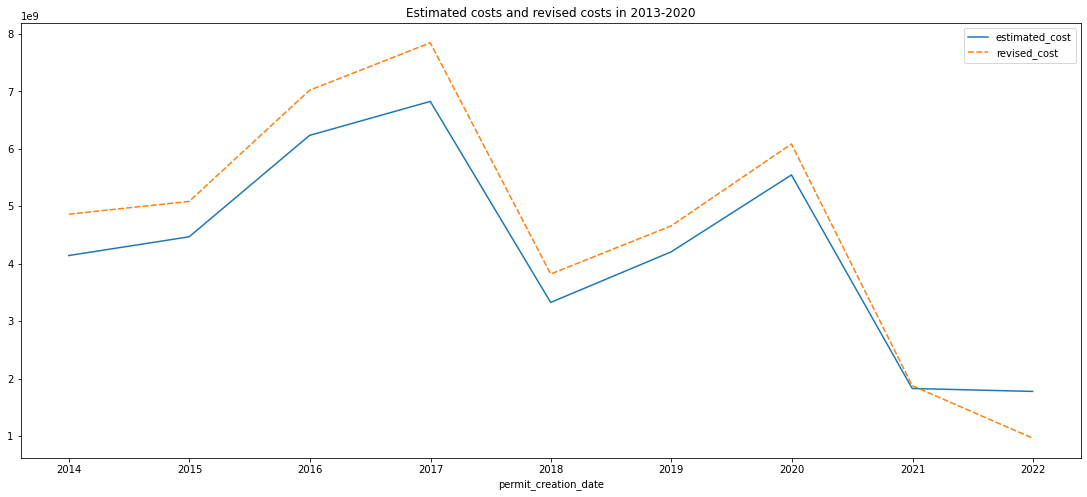

In [19]:
data_cost_y = data_cost.groupby(pd.Grouper(freq='Y')).sum()
plt.figure(figsize=(19,8))
# Add title
plt.title("Estimated costs and revised costs in 2013-2020")
# Line chart showing daily global streams of each song 
sns.lineplot(data=data_cost_y)

Let's look at the number of building permits by day of the week. To do this, select the data from our previous data loc dataframe. Using the day_name function, we define for each date in the string the day of the week. Group all the data by day of the week. And display our data in a new chart.


C:\Users\Arthur\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='permit_creation_date'>

<Figure size 1296x432 with 0 Axes>

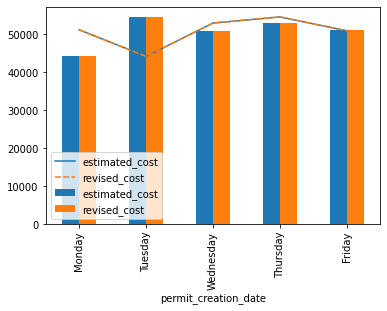

In [20]:
data_cost_d = data_loc
data_cost_d = data_cost_d.dropna()
data_cost_d.permit_creation_date = data_cost_d.permit_creation_date.dt.day_name()

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
data_cost_d  = data_cost_d.groupby(['permit_creation_date']).count().reindex(cats) 
plt.figure(figsize=(18,6))
data_cost_d.plot.bar()
sns.lineplot(data=data_cost_d)

Now create new latitude and longitude data for each object: 
* To do this, we will split the Location column using the split function. 
* And create a new dataframe where we will already have new data on latitude and longitude and "estimated cost".
* Also here we will remove all zero values ​​from our new data frame.


In [21]:
df.location[0]

'POINT (-122.47316095095957 37.78085657756962)'

In [22]:
type(df.location[0])

str

In [23]:
df.location = df.location.str.replace('POINT ','').replace('(','').replace(')','')

In [24]:
df[['long','lat']] = df.location.str.split(" ",expand=True)
data_location = df.loc[:,['lat','long','zipcode','estimated_cost']]
data_location = data_location.dropna()
data_location.head()

,lat,long,zipcode,estimated_cost
0,37.78085657756962),(-122.47316095095957,94118.0,286.0
1,37.79034659835155),(-122.39223991655416,94105.0,180000.0
2,37.80255583790171),(-122.43763620022534,94123.0,8000.0
3,37.79034659835155),(-122.39223991655416,94105.0,75000.0
4,37.78844687010852),(-122.39863917066845,94105.0,75000.0


* Using the apply function, we remove the opening and closing quotes from the latitude and longitude columns.
* Using the info function, we see that there are 227,000 rows in our dataframe. Large enough dataframe for analysis.



In [25]:
data_location.long = data_location.long.apply(lambda x: x.replace('(',''))
data_location.lat = data_location.lat.apply(lambda x: x.replace(')',''))
data_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259894 entries, 0 to 322349
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   lat             259894 non-null  object 
 1   long            259894 non-null  object 
 2   zipcode         259894 non-null  float64
 3   estimated_cost  259894 non-null  float64
dtypes: float64(2), object(2)
memory usage: 9.9+ MB


Using the to_numeric function, we translate the data in the latitude and longitude columns to float64 format - that is, a floating-point number.

In [26]:
data_location.head()

,lat,long,zipcode,estimated_cost
0,37.78085657756962,-122.47316095095957,94118.0,286.0
1,37.79034659835155,-122.39223991655416,94105.0,180000.0
2,37.80255583790171,-122.43763620022534,94123.0,8000.0
3,37.79034659835155,-122.39223991655416,94105.0,75000.0
4,37.78844687010852,-122.39863917066845,94105.0,75000.0


In [27]:
data_location.lat = pd.to_numeric(data_location.lat)
data_location.long = pd.to_numeric(data_location.long)

* Group all our dataframe “Data Location” by the zip code parameter. 
* At the same time, when grouping the data in the columns latitude, longitude and cost - all values will be taken as average values.
That is, they will not be summed up, as we already did before, but here the average values ​​will be taken.

In [28]:
data_location_mean = data_location.groupby(['zipcode'])['lat','long','estimated_cost'].mean()
data_location_mean.head()

<ipython-input-28-7fa5e8470abb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_location_mean = data_location.groupby(['zipcode'])['lat','long','estimated_cost'].mean()


,lat,long,estimated_cost
zipcode,,,
94102.0,37.780151,-122.417695,373589.292282
94103.0,37.775099,-122.411827,467205.925764
94104.0,37.791425,-122.402092,154826.184984
94105.0,37.789537,-122.396431,546954.927963
94107.0,37.769241,-122.396289,597994.507043


Using the folium library, we can display the average postcode price on a San Francisco map. 
* To do this, we will set the center of our map to a point with the long and lat values, which will be taken from our data frame by the average value in the latitude and longitude columns. 
* Jumpstart points to the scale of the map and with the argument Stamen Toner - points to the black and white style that we will use for the map.
* Using the for loop and the Circle function, we can specify the average estimated_cost as a circle, where each circle will point to a zip code with the center of longitude and latitude. 

From this map, we can conclude that on Treasure Island we have the highest average cost of a building permit.

In [29]:
import folium
from folium import Circle

# map folium display
lat = data_location_mean.lat.mean()
long = data_location_mean.long.mean()
map1 = folium.Map(location = [lat, long], zoom_start = 12, tiles='Stamen Toner')
param = 'estimated_cost'
for i in range(0,len(data_location_mean)):
    Circle(
        location = [data_location_mean.iloc[i]['lat'], data_location_mean.iloc[i]['long']],
        radius= [data_location_mean.iloc[i]['estimated_cost']/5000],
        fill = True).add_to(map1)
map1

Let's look at the total total cost of building permits depending on the zip code. 
* Group all the data that is in the Data Location data frame by zip code. Now the values from the longitude and latitude columns will be averaged when grouping. 
* And display our new dataframe Data Location.

In [30]:
data_location_lang_long = data_location.groupby(['zipcode'])['lat','long'].mean()
data_location_lang_long.head()

<ipython-input-30-eb4545b560db>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_location_lang_long = data_location.groupby(['zipcode'])['lat','long'].mean()


,lat,long
zipcode,,
94102.0,37.780151,-122.417695
94103.0,37.775099,-122.411827
94104.0,37.791425,-122.402092
94105.0,37.789537,-122.396431
94107.0,37.769241,-122.396289


After the first grouping, using the assign function, we add to our frame date a new column called cost, which in turn was grouped by zip code, and in which it is no longer the average value - but the sum of all the values ​​in the group.

In [31]:
data_location_lang_long = data_location_lang_long.assign(cost = data_location.groupby(['zipcode'])['estimated_cost'].sum())
data_location_lang_long.head()

,lat,long,cost
zipcode,,,
94102.0,37.780151,-122.417695,3.348481e+09
94103.0,37.775099,-122.411827,6.462860e+09
94104.0,37.791425,-122.402092,1.007144e+09
94105.0,37.789537,-122.396431,7.426007e+09
94107.0,37.769241,-122.396289,6.440401e+09


Using the folium library, we will once again display our data on the total cost of all building permits for the postal code. From this we see that the total total cost of the appeal is mainly localized in downtown. And specifically on several of the main streets of San Francisco. At the same time, on a treasure island, where there was a very large average cost of building permits - the total cost of work at the level of suburban areas.


In [32]:
import folium
from folium import Circle

# map folium display
lat = data_location_lang_long.lat.mean()
long = data_location_lang_long.long.mean()
map1 = folium.Map(location = [lat, long], zoom_start = 12)

for i in range(0,len(data_location_lang_long)):
    Circle(
        location = [data_location_lang_long.iloc[i]['lat'], data_location_lang_long.iloc[i]['long']],
        radius= [data_location_lang_long.iloc[i]['cost']/20000000],
        fill = True).add_to(map1)
map1

For the prediction problem, we choose the "estimated cost" parameter.
* Using the heatmap function, we display the correlations between our parameters and see that the "estimated cost" parameter has practically no correlation with other parameters, which of course greatly complicates our task of predicting estimated_cost.

<AxesSubplot:>

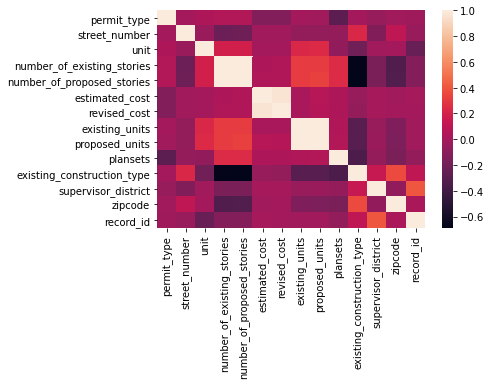

In [33]:
import seaborn as sn
sn.heatmap(df.corr())

<AxesSubplot:>

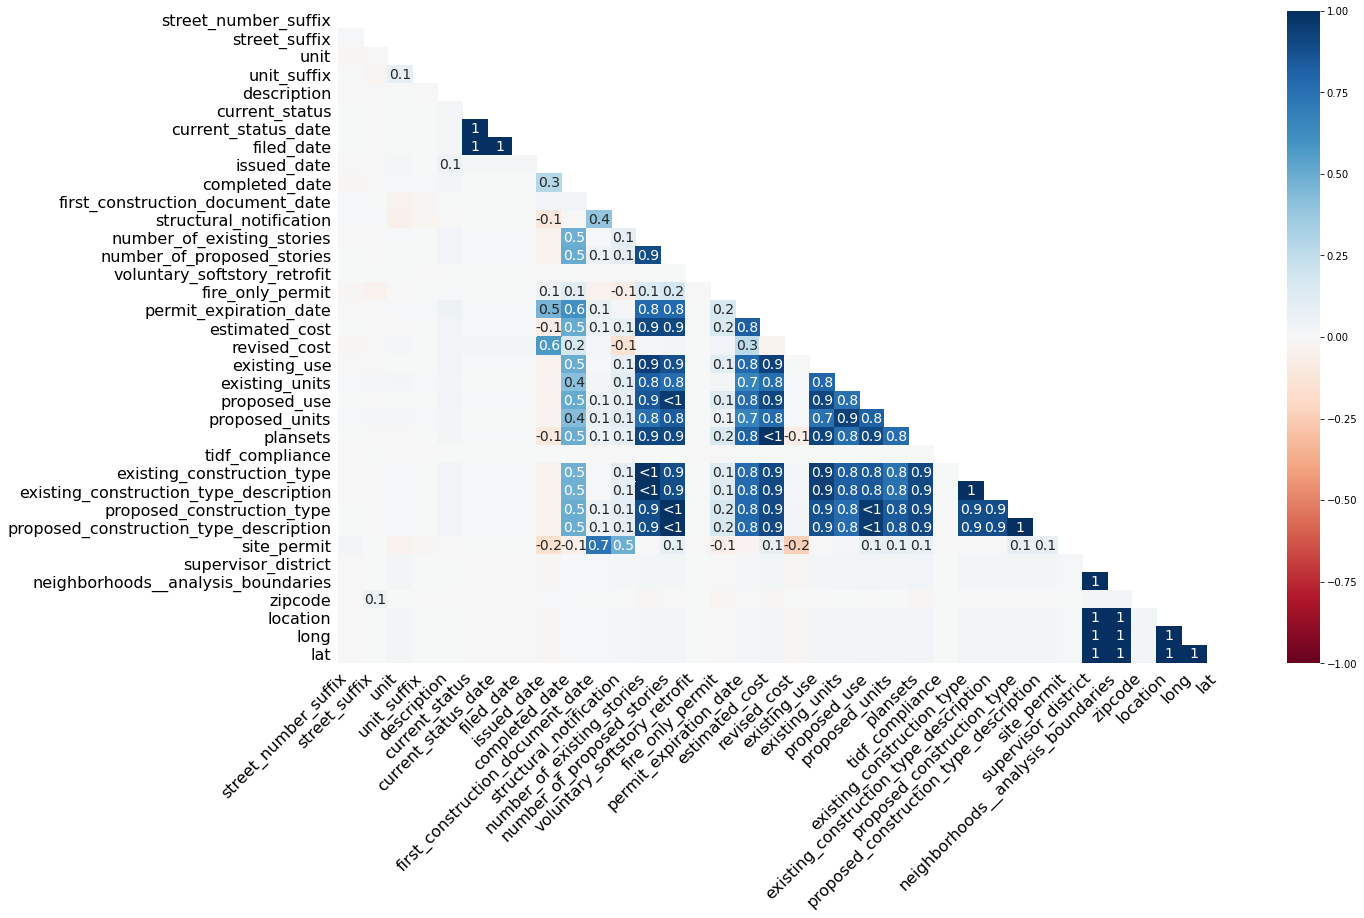

In [34]:
msno.heatmap(df)

* In order to limit our selection, we first remove all empty values from the description column. 

In [35]:
df.head()

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id,long,lat
0,201301027052,7,wall or painted sign,01/02/2013,1446,024,5000,NaN,Geary,Bl,NaN,NaN,vinyl lettering on awning and windows,complete,01/25/2013,01/02/2013,01/02/2013,01/25/2013,NaN,NaN,NaN,NaN,NaN,NaN,12/28/2013,286.0,286.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Outer Richmond,94118.0,(-122.47316095095957 37.78085657756962),1292126100033,(-122.47316095095957,37.78085657756962)
1,201301027060,8,otc alterations permit,01/02/2013,3740,034,221,NaN,Main,St,NaN,NaN,4th floor:demo of corridor and elevator lobby ...,complete,08/23/2013,01/02/2013,02/07/2013,08/23/2013,NaN,NaN,16.0,16.0,NaN,NaN,01/23/2016,180000.0,180000.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,(-122.39223991655416 37.79034659835155),1292138165681,(-122.39223991655416,37.79034659835155)
2,201301027061,8,otc alterations permit,01/02/2013,0467A,046,180,NaN,Mallorca,Wy,NaN,NaN,"unit #206: demo old kitchen cabinets, install...",complete,02/20/2013,01/02/2013,01/02/2013,02/20/2013,NaN,NaN,3.0,3.0,NaN,NaN,12/28/2013,8000.0,9200.0,apartments,24.0,apartments,24.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,2.0,Marina,94123.0,(-122.43763620022534 37.80255583790171),1292135234367,(-122.43763620022534,37.80255583790171)
3,201301027063,8,otc alterations permit,01/02/2013,3740,034,221,NaN,Main,St,NaN,NaN,2nd floor:demo of corridor and elevator lobby ...,complete,08/23/2013,01/02/2013,02/07/2013,08/23/2013,NaN,NaN,16.0,16.0,NaN,NaN,02/02/2014,75000.0,75000.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,(-122.39223991655416 37.79034659835155),1292140165681,(-122.39223991655416,37.79034659835155)
4,201301027064,8,otc alterations permit,01/02/2013,3721,120,555,NaN,Mission,St,0.0,NaN,tenant improvement on a new multi-tenant floor...,complete,04/01/2013,01/02/2013,01/08/2013,04/01/2013,NaN,NaN,34.0,34.0,NaN,NaN,01/03/2014,75000.0,75000.0,office,NaN,office,NaN,2.0,NaN,1.0,constr type 1,1,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,(-122.39863917066845 37.78844687010852),1292139394511,(-122.39863917066845,37.78844687010852)


In [36]:
dfn = df.dropna(subset=['description'])
dfn.description.isnull().values.any()

False

From our entire data frame, we will select only the data for which the description parameter has the value reroofing, that is, the work of deconstructing the old and creating a new roof. We select all the objects on which some changes on the roof have been made since 2014.


In [37]:
dfn = dfn[dfn['description'].str.match('reroofing')]
dfn.head()

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id,long,lat
8,201301027070,8,otc alterations permit,01/02/2013,2004,043,1726,NaN,46th,Av,NaN,NaN,reroofing,complete,01/10/2013,01/02/2013,01/02/2013,01/10/2013,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,9000.0,9000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,(-122.50516829149932 37.75429040964175),1292145121433,(-122.50516829149932,37.75429040964175)
13,201301027079,8,otc alterations permit,01/02/2013,1230,017,580,NaN,Cole,St,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,(-122.45008165265168 37.76982351216478),1292157240679,(-122.45008165265168,37.76982351216478)
14,201301027079,8,otc alterations permit,01/02/2013,1230,017,588,NaN,Cole,St,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,(-122.45008165265168 37.76982351216478),1292158285755,(-122.45008165265168,37.76982351216478)
37,201301027045,8,otc alterations permit,01/02/2013,6795C,004,136,NaN,Santa Rosa,Av,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,1.0,1.0,NaN,NaN,12/28/2013,7000.0,7000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,11.0,Outer Mission,94112.0,(-122.43642258273363 37.727231553475434),1292119213295,(-122.43642258273363,37.727231553475434)
38,201301027046,8,otc alterations permit,01/02/2013,6540,013,4330,NaN,25th,St,NaN,NaN,reroofing,complete,02/01/2013,01/02/2013,01/02/2013,02/01/2013,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,7000.0,7000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,8.0,Noe Valley,94114.0,(-122.43690075591613 37.74975957949613),1292163206841,(-122.43690075591613,37.74975957949613)


* Present graphically our new data. To do this, we Select from our already cleared dfn dataframe - 'estimated_cost', 'existing_use', 'existing_units', 'zipcode', 'issued_date'. 
* And we delete all empty lines with empty values.


In [38]:
df_unit = dfn.loc[:,['estimated_cost','existing_use', 'existing_units', 'zipcode','issued_date']]
df_unit = df_unit.dropna()
df_unit.head(15)

,estimated_cost,existing_use,existing_units,zipcode,issued_date
8,9000.0,1 family dwelling,1.0,94122.0,01/02/2013
13,18000.0,apartments,7.0,94117.0,01/02/2013
14,18000.0,apartments,7.0,94117.0,01/02/2013
37,7000.0,1 family dwelling,1.0,94112.0,01/02/2013
38,7000.0,1 family dwelling,1.0,94114.0,01/02/2013
43,8650.0,1 family dwelling,1.0,94112.0,01/02/2013
79,8840.0,1 family dwelling,1.0,94134.0,01/02/2013
99,5000.0,1 family dwelling,1.0,94124.0,01/03/2013
106,6500.0,1 family dwelling,1.0,94112.0,01/03/2013
107,6780.0,1 family dwelling,1.0,94132.0,01/03/2013


Here we will have large emissions due to the fact that hotels and industrial buildings are also taken into account here. 
* Therefore, we will limit our data frame to only one-story, two-story houses, offices and apartments.

In [39]:
df_unit[df_unit.existing_use.str.contains("family|office|apartments")]


,estimated_cost,existing_use,existing_units,zipcode,issued_date
8,9000.0,1 family dwelling,1.0,94122.0,01/02/2013
13,18000.0,apartments,7.0,94117.0,01/02/2013
14,18000.0,apartments,7.0,94117.0,01/02/2013
37,7000.0,1 family dwelling,1.0,94112.0,01/02/2013
38,7000.0,1 family dwelling,1.0,94114.0,01/02/2013
...,...,...,...,...,...
322300,9000.0,2 family dwelling,2.0,94112.0,10/08/2021
322329,20000.0,apartments,8.0,94110.0,10/08/2021
322341,28240.0,apartments,4.0,94116.0,10/08/2021
322342,59580.0,2 family dwelling,2.0,94118.0,10/08/2021


On the new chart we display the average "estimated cost" by type of housing. On this graph you can see how much higher the average "estimated cost" of repairing roofs in office buildings is. Here you can certainly talk about some kind of “cartel conspiracy” :). At the same time, the average cost of repairing a roof for two and one family house is practically the same.

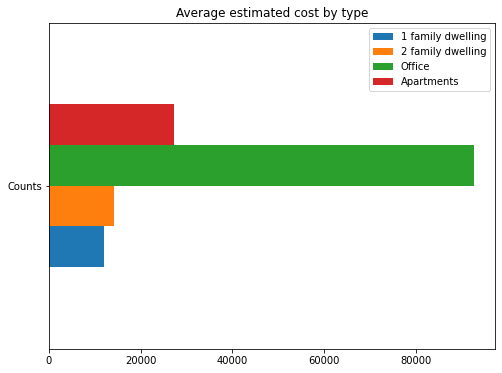

In [40]:
fam1 = df_unit[df_unit['existing_use']=='1 family dwelling']['estimated_cost'].mean()
fam2 = df_unit[df_unit['existing_use']=='2 family dwelling']['estimated_cost'].mean()
office = df_unit[df_unit['existing_use']=='office']['estimated_cost'].mean()
apartments = df_unit[df_unit['existing_use']=='apartments']['estimated_cost'].mean()

data = {'1 family dwelling':fam1,'2 family dwelling':fam2,'Office':office,'Apartments':apartments}
typedf = pd.DataFrame(data = data,index=['Counts'])
typedf.plot(kind='barh', title="Average estimated cost by type", figsize=(8,6));

Group all these data by years. 
* We will select data for only one private house and apartment, since for the office the cost data is too high. 
* And here, as in previous examples, we will group our data with average values.

On the graph you can see that the value for apartments varies greatly from year to year, while for two family and one family houses estimed cost do not change so much. And in the second graph we see that the cost is growing from year to year - this way you can see inflation in the construction market. We can approximately see that inflation, for example, by the average cost of repairing a roof from 2014 to 2019 was approximately 30%. That is, inflation in the construction market is 6% per year.

<AxesSubplot:>

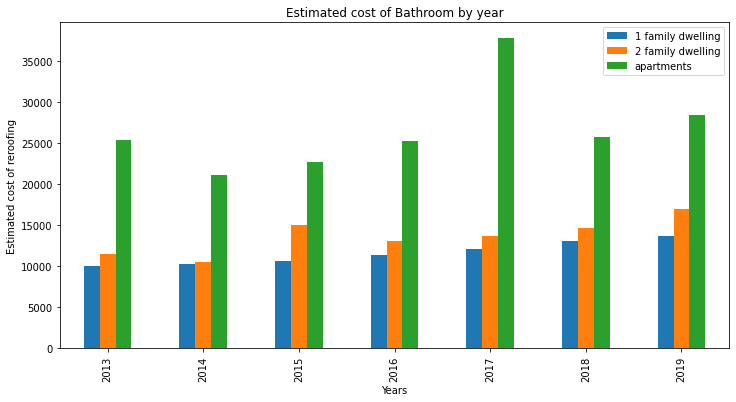

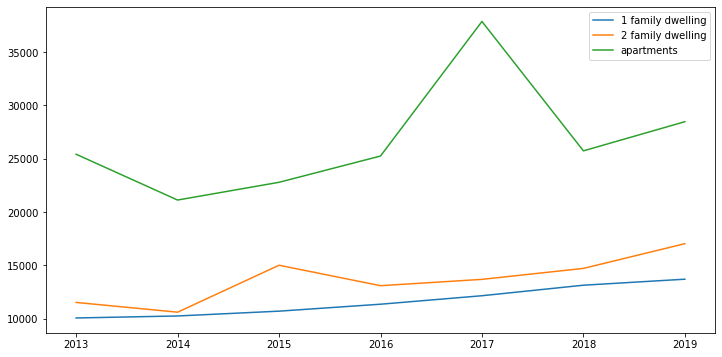

In [41]:
df_unit.issued_date = pd.to_datetime(df_unit.issued_date)
df_unit.issued_date = df_unit.issued_date.dt.year
years = list(range(2013, 2020)) 
keywords = ['1 family dwelling','2 family dwelling','apartments']

val_data = []
for year in years:
    iss_data = []
    for word in keywords:
        v = df_unit[(df_unit['existing_use']==word) & (df_unit['issued_date']== year)]['estimated_cost'].mean()
        iss_data.append(v)
    val_data.append(iss_data)
#print(val_data)
dfnew = pd.DataFrame(data=val_data, index=years, columns=keywords)
dfnew.head()


dfnew.plot.bar(figsize=(12, 6)) 
plt.xlabel("Years")
plt.ylabel("Estimated cost of reroofing")
plt.title("Estimated cost of Bathroom by year");
dfnew.plot.line(figsize=(12, 6))

# "estimated cost"

We set ourselves the task of determining the "estimated cost" by several parameters.
At the next stage, we need to determine all the characteristics by which we will determine the estimetet cost for roof repairs for a new facility. Unfortunately, we do not have data on the size of objects and the cost of, for example, the house itself, which would be the main parameter in determining the cost of work. We will work with those parameters that are in the public domain.


In [42]:
df_corr = dfn.dropna(subset=['existing_use'])
df_corr.description.isnull().values.any()

False

*  To limit our selection and improve the prediction, we will take data for only 1 family houses.


In [43]:
df_1fam = df_corr[df_corr.existing_use.str.contains('1 family')]

* First we find all the characteristics with numerical values in our data frame. 
* And sort them by correlation with our desired value "estimated cost".

In [44]:
num_feuture = df_1fam.select_dtypes(include=[np.number])
corr = num_feuture.corr()
print(corr['estimated_cost'].sort_values(ascending = False))

estimated_cost                1.000000
revised_cost                  0.956500
number_of_existing_stories    0.145671
number_of_proposed_stories    0.142639
proposed_units                0.046884
existing_units                0.044760
street_number                 0.035291
existing_construction_type   -0.000576
plansets                     -0.005527
zipcode                      -0.021433
unit                         -0.069243
supervisor_district          -0.148840
record_id                    -0.174063
permit_type                        NaN
Name: estimated_cost, dtype: float64


In [45]:
"""
dfn = dfn.reset_index(drop=True)
dfn = dfn[~dfn.location.isna()]
dfn.location = dfn.location.str.replace('(','').replace(')','')
dfn.location.isna()

dfn[['long','lat']] = dfn.location.str.split("",expand=True)
dfn.head()
"""

'\ndfn = dfn.reset_index(drop=True)\ndfn = dfn[~dfn.location.isna()]\ndfn.location = dfn.location.str.replace(\'(\',\'\').replace(\')\',\'\')\ndfn.location.isna()\n\ndfn[[\'long\',\'lat\']] = dfn.location.str.split("",expand=True)\ndfn.head()\n'

In [46]:
dfn.location.sample(2)

273619    (-122.43281433418204 37.78778472294637)
20112      (-122.4141564924893 37.78153739577705)
Name: location, dtype: object

In [47]:
dfn.head(2)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id,long,lat
8,201301027070,8,otc alterations permit,01/02/2013,2004,043,1726,NaN,46th,Av,NaN,NaN,reroofing,complete,01/10/2013,01/02/2013,01/02/2013,01/10/2013,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,9000.0,9000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,(-122.50516829149932 37.75429040964175),1292145121433,(-122.50516829149932,37.75429040964175)
13,201301027079,8,otc alterations permit,01/02/2013,1230,017,580,NaN,Cole,St,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,(-122.45008165265168 37.76982351216478),1292157240679,(-122.45008165265168,37.76982351216478)


In [48]:
dfn.long[8]

'(-122.50516829149932'

In [49]:
type(dfn.long[8])

str

In [50]:
dfn.long = dfn.long.str.replace('(','')
dfn.lat = dfn.lat.str.replace(')','')

In [51]:
dfn.head()

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id,long,lat
8,201301027070,8,otc alterations permit,01/02/2013,2004,043,1726,NaN,46th,Av,NaN,NaN,reroofing,complete,01/10/2013,01/02/2013,01/02/2013,01/10/2013,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,9000.0,9000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,(-122.50516829149932 37.75429040964175),1292145121433,-122.50516829149932,37.75429040964175
13,201301027079,8,otc alterations permit,01/02/2013,1230,017,580,NaN,Cole,St,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,(-122.45008165265168 37.76982351216478),1292157240679,-122.45008165265168,37.76982351216478
14,201301027079,8,otc alterations permit,01/02/2013,1230,017,588,NaN,Cole,St,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,(-122.45008165265168 37.76982351216478),1292158285755,-122.45008165265168,37.76982351216478
37,201301027045,8,otc alterations permit,01/02/2013,6795C,004,136,NaN,Santa Rosa,Av,NaN,NaN,reroofing,issued,01/02/2013,01/02/2013,01/02/2013,NaN,NaN,NaN,1.0,1.0,NaN,NaN,12/28/2013,7000.0,7000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,11.0,Outer Mission,94112.0,(-122.43642258273363 37.727231553475434),1292119213295,-122.43642258273363,37.727231553475434
38,201301027046,8,otc alterations permit,01/02/2013,6540,013,4330,NaN,25th,St,NaN,NaN,reroofing,complete,02/01/2013,01/02/2013,01/02/2013,02/01/2013,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,7000.0,7000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,8.0,Noe Valley,94114.0,(-122.43690075591613 37.74975957949613),1292163206841,-122.43690075591613,37.74975957949613


In [52]:
#dfn.long = dfn.long.apply(lambda x: x.replace('(',''))
#dfn.lat = dfn.lat.apply(lambda x: x.replace(')',''))

Since we see that our "estimated cost" is little correlated with other parameters, so take 'permit_creation_date', 'zipcode', 'number_of_existing_stories', 'number_of_proposed_stories', 'current_police_districts' and other parameters that somehow correlate with the cost. 

In [53]:
dfn.sample(3)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_softstory_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods__analysis_boundaries,zipcode,location,record_id,long,lat
303676,202101122494,8,otc alterations permit,01/12/2021,6972,013,354,NaN,Niagara,Av,NaN,NaN,reroofing,filed,01/12/2021,01/12/2021,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,8000.0,8000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,11.0,Outer Mission,94112.0,(-122.44663729483622 37.71931605401248),1607829215832,-122.44663729483622,37.71931605401248
139365,201609076994,8,otc alterations permit,09/07/2016,0507,026,1873,NaN,Lombard,St,0.0,NaN,reroofing,complete,09/30/2016,09/07/2016,09/07/2016,09/30/2016,NaN,NaN,3.0,3.0,NaN,NaN,09/02/2017,14000.0,14000.0,apartments,3.0,apartments,3.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,2.0,Marina,94123.0,(-122.43218031593838 37.80004948192145),1436443406820,-122.43218031593838,37.80004948192145
280127,202001222482,8,otc alterations permit,01/22/2020,3608,007,970,NaN,Valencia,St,NaN,NaN,reroofing,complete,02/10/2020,01/22/2020,01/22/2020,02/10/2020,NaN,NaN,3.0,3.0,NaN,NaN,01/22/2021,31900.0,31900.0,2 family dwelling,2.0,2 family dwelling,2.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,8.0,Mission,94110.0,(-122.42149642713608 37.757358438120846),1583098161719,-122.42149642713608,37.757358438120846


In [54]:
df_1fam.columns

Index(['permit_number', 'permit_type', 'permit_type_definition',
       'permit_creation_date', 'block', 'lot', 'street_number',
       'street_number_suffix', 'street_name', 'street_suffix', 'unit',
       'unit_suffix', 'description', 'current_status', 'current_status_date',
       'filed_date', 'issued_date', 'completed_date',
       'first_construction_document_date', 'structural_notification',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'voluntary_softstory_retrofit', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'tidf_compliance', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'site_permit',
       'supervisor_district', 'neighborhoods__analysis_boundaries', 'zipcode',
       'location', 'record_id', 'long', 

In [55]:
#df_pr = dfn.loc[:,['permit_creation_date', 'existing_use', 'existing_units','estimated_cost','zipcode','current_supervisor_districts', 'analysis_neighborhoods', ]]
#df_pr = dfn.loc[:,['permit_creation_date', 'zipcode', 'existing_use', 'existing_construction_type', 'estimated_cost', 'long','lat' ]]#
#df_pr = df_1fam.loc[:,['permit_creation_date', 'zipcode', 'number_of_existing_stories', 'number_of_proposed_stories',  'current_police_districts', 'existing_use', 'long','lat', 'record_id',  'estimated_cost',  ]]

df_pr = df_1fam.loc[:,['permit_creation_date',
                       'zipcode',
                       'number_of_existing_stories',
                       'number_of_proposed_stories',
                       #'current_police_districts', 
                       'long',
                       'lat',
                       'record_id',
                       'estimated_cost', ]]
df_pr = df_pr.dropna()

In [56]:
#df_pr = df_pr[df_pr.existing_use.str.contains('1 family')]
df_pr.permit_creation_date = pd.to_datetime(df_pr.permit_creation_date)
df_pr.head()

,permit_creation_date,zipcode,number_of_existing_stories,number_of_proposed_stories,long,lat,record_id,estimated_cost
8,2013-01-02,94122.0,2.0,2.0,(-122.50516829149932,37.75429040964175),1292145121433,9000.0
37,2013-01-02,94112.0,1.0,1.0,(-122.43642258273363,37.727231553475434),1292119213295,7000.0
38,2013-01-02,94114.0,2.0,2.0,(-122.43690075591613,37.74975957949613),1292163206841,7000.0
43,2013-01-02,94112.0,2.0,2.0,(-122.45307698321722,37.71720245771851),1292130219678,8650.0
79,2013-01-02,94134.0,2.0,2.0,(-122.41846325039538,37.725776843164866),1292131192813,8840.0


Let's look at the distribution of the "estimated cost" values ​​in the form of a histogram. Here we will see that we have some values ​​of $ 200,000 and there are very few of them. And a large number of small values.

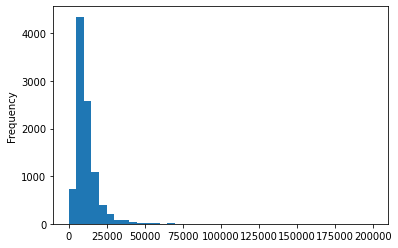

In [57]:
histplot = df_pr.estimated_cost.plot.hist(bins = 40)

* We will consider this data as outliers and delete them from our dataframe.
That is, we delete all the lines where the "estimated cost" will be more than 20,000 and less than 12,000. 


In [58]:
indexNames = df_pr[ (df_pr['estimated_cost'] > 20000)].index
df_pr.drop(indexNames , inplace=True)

In [59]:
indexNames = df_pr[ (df_pr['estimated_cost'] < 12000)].index
df_pr.drop(indexNames , inplace=True)

And now our distribution will not look so one-sided.

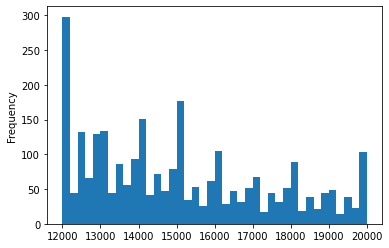

In [60]:
histplot = df_pr.estimated_cost.plot.hist(bins = 40)

Using the Johnson library, we can look at the "normality" of the distribution of our values

<AxesSubplot:title={'center':'Normal'}, xlabel='estimated_cost'>

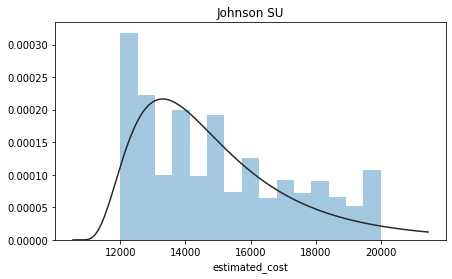

<Figure size 504x288 with 0 Axes>

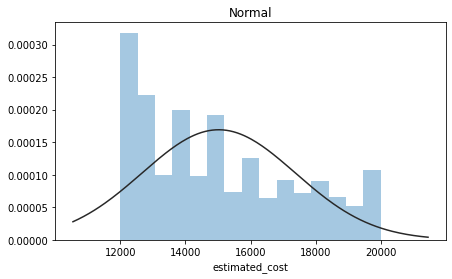

In [61]:
import scipy.stats as st
y = df_pr['estimated_cost']
plt.figure(figsize=(7,4))
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(figsize=(7,4))
plt.figure(figsize=(7,4))
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

In [62]:
df_pr.describe()

,zipcode,number_of_existing_stories,number_of_proposed_stories,record_id,estimated_cost
count,2735.000000,2735.000000,2735.000000,2.735000e+03,2735.000000
mean,94120.435101,1.980987,1.984278,1.345437e+12,15023.434673
std,7.575570,0.561184,0.564858,4.142293e+11,2358.313326
min,94102.000000,1.000000,1.000000,1.295869e+11,12000.000000
25%,94114.000000,2.000000,2.000000,1.366972e+12,13000.000000
50%,94121.000000,2.000000,2.000000,1.471671e+12,14652.000000
75%,94127.000000,2.000000,2.000000,1.564439e+12,16800.000000
max,94134.000000,5.000000,5.000000,1.627318e+12,20000.000000


* As we did before, we remove the extra characters from the columns of longitude and latitude

In [63]:
df_pr.head(1)

,permit_creation_date,zipcode,number_of_existing_stories,number_of_proposed_stories,long,lat,record_id,estimated_cost
208,2013-01-03,94132.0,2.0,2.0,(-122.4705204888339,37.71580667926857),1292272220686,15000.0


In [64]:
df_pr.long= df_pr.long.apply(lambda x: x.replace('(',''))
df_pr.lat = df_pr.lat.apply(lambda x: x.replace(')',''))
df_pr.lat = pd.to_numeric(df_pr.lat)
df_pr.long = pd.to_numeric(df_pr.long)

Find the distance to the center of Downtown San Francisco. That is, we will take each object and from its point of latitude and longitude we will find the distance to the city center that is, to the value of the longitude and width of downtown San Francisco (37.7945742, -122.3999445).

In [65]:
#geodesic instead of vincenty
from geopy.distance import geodesic
def distance_calc (row):
    start = (row['lat'], row['long'])
    stop = (37.7945742, -122.3999445)

    return geodesic(start, stop).meters/1000

df_pr['distance'] = df_pr.apply (lambda row: distance_calc (row),axis=1)

Create a new Downtown proximity parameter, that is, the distance from the city center, in which we will have four different values. *

1. Downtown itself, 
2.  <0.5H on foot to Downtown
3. <1H Downtown on foot to Downtown
4. ">=" 10 -> Outside SF


In [66]:
def downtown_proximity(dist):
    '''
    < 2 -> Near Downtown
    >= 2, <6 -> <0.5H Downtown
    >= 6, <10 -> <1H Downtown 
    >= 10 -> Outside SF

    '''
    if dist < 2:
        return 'Downtown'
    elif dist < 6:
        return  '<0.5H Downtown'
    elif dist < 10:
        return '<1H Downtown'
    elif dist >= 10:
        return 'Outside SF'

df_pr['downtown_proximity'] = df_pr.distance.apply(downtown_proximity)

Display the average values ​​of the "estimated cost" by category in our new Downtown proximity column. Here you can see that the average cost differ by about 6 - 7%. In principle, houses in a rich area spend on the roof about 10% more than people whose houses are farther from the center.


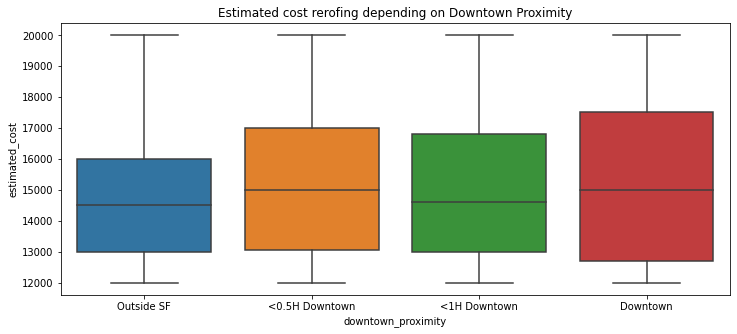

In [67]:
value_count=df_pr['downtown_proximity'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Estimated cost rerofing depending on Downtown Proximity');
sns.boxplot(x="downtown_proximity", y="estimated_cost", data=df_pr);


Look at the same data on the map and see the amount of data by distance from the center. Here, we chose the distance of 3 km to the city center as the main indicator - where the yellow dots show objects on the map that are located up to 3 km from the city center.


Data points within treshhold: 54


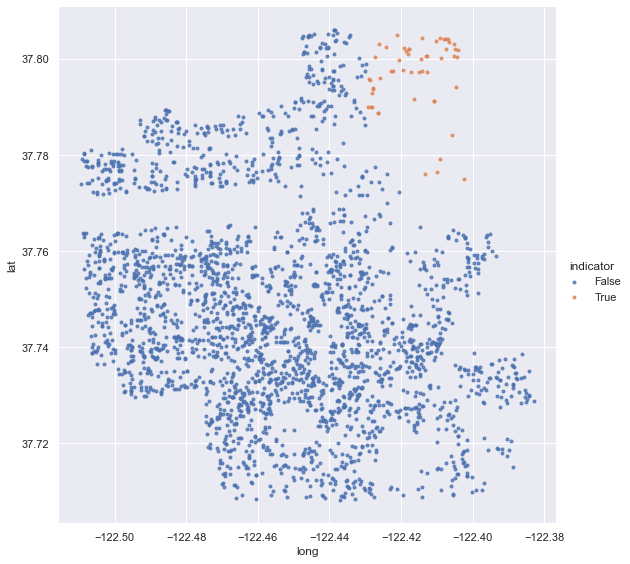

In [68]:
sns.set()
local_coord=[-122.3999445, 37.7945742] # the point near which we want to look at our variables
euc_dist_th = 0.03 # distance treshhold

euclid_distance=df_pr[['lat','long']].apply(lambda x:np.sqrt((x['long']-local_coord[0])**2+(x['lat']-local_coord[1])**2), axis=1)

# indicate wethere the point is within treshhold or not
indicator=pd.Series(euclid_distance<=euc_dist_th, name='indicator')

print("Data points within treshhold:", sum(indicator));

# a small map to visualize th eregion for analysis
sns.lmplot('long', 'lat', data=pd.concat([df_pr,indicator], axis=1), hue='indicator', markers ='.', fit_reg=False, height=8);


On the new map we can mark all our objects in our 4 categories: city center, half an hour on foot, 1 hour, or outside the city.


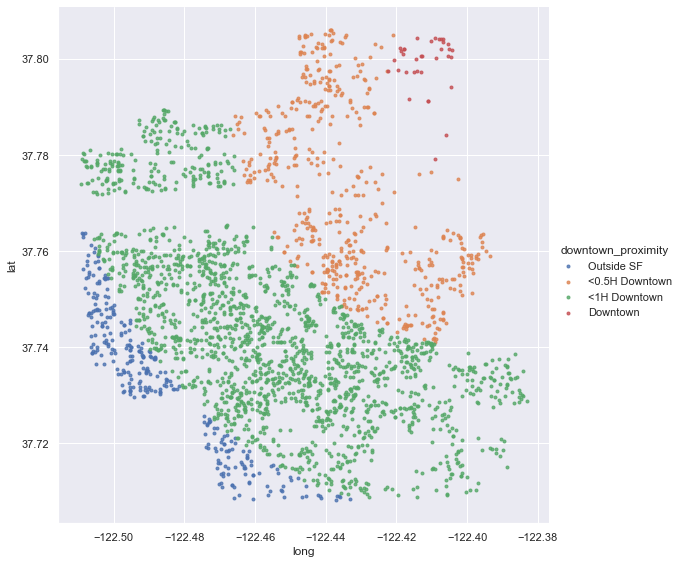

In [69]:
sns.lmplot('long', 'lat', data=df_pr,markers ='.', hue='downtown_proximity', fit_reg=False, height=8)
plt.show()

* Create a new column for the year 
* Delete the value that is no longer needed - permit_creation_date and location which we already used, in order to find the longitude and latitude.

In [70]:
#df_pr['month'] = df_pr.permit_creation_date.dt.month
df_pr['year'] = df_pr.permit_creation_date.dt.year
df_pr = df_pr.drop(columns=['permit_creation_date', 'long', 'lat'])

get_dummies - Convert categorical variable downtown_proximity into dummy/indicator variables (0,1).

In [71]:
#df_pr = pd.concat([df_pr, pd.get_dummies(df_pr.existing_use, prefix='existing_use')], axis=1)
df_pr = pd.concat([df_pr, pd.get_dummies(df_pr.downtown_proximity, prefix='dt_pr')], axis=1)

#df_pr = df_pr.drop(columns=['existing_use'])
df_pr = df_pr.drop(columns=['downtown_proximity'])

In [72]:
df_pr.describe()

,zipcode,number_of_existing_stories,number_of_proposed_stories,record_id,estimated_cost,distance,year,dt_pr_<0.5H Downtown,dt_pr_<1H Downtown,dt_pr_Downtown,dt_pr_Outside SF
count,2735.000000,2735.000000,2735.000000,2.735000e+03,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,94120.435101,1.980987,1.984278,1.345437e+12,15023.434673,7.583666,2017.225594,0.191225,0.688117,0.012797,0.107861
std,7.575570,0.561184,0.564858,4.142293e+11,2358.313326,2.072679,2.393435,0.393338,0.463347,0.112419,0.310262
min,94102.000000,1.000000,1.000000,1.295869e+11,12000.000000,0.409313,2013.000000,0.000000,0.000000,0.000000,0.000000
25%,94114.000000,2.000000,2.000000,1.366972e+12,13000.000000,6.383439,2015.000000,0.000000,0.000000,0.000000,0.000000
50%,94121.000000,2.000000,2.000000,1.471671e+12,14652.000000,7.833368,2017.000000,0.000000,1.000000,0.000000,0.000000
75%,94127.000000,2.000000,2.000000,1.564439e+12,16800.000000,9.217224,2019.000000,0.000000,1.000000,0.000000,0.000000
max,94134.000000,5.000000,5.000000,1.627318e+12,20000.000000,11.279643,2021.000000,1.000000,1.000000,1.000000,1.000000



We can escalate the value in our data 

* Or we can simply subtract the minimum values from the data with large values.
* For example, from the values of the year we subtract the minimum value - thereby we reduce the total value and these values will less affect our predictions.


In [73]:
#df_pr.existing_units = df_pr.existing_units.apply(lambda x: 10 if x > 10 else x)
df_pr.zipcode = df_pr.zipcode - df_pr.zipcode.min()
df_pr.year = df_pr.year - df_pr.year.min()
df_pr.record_id = df_pr.record_id - df_pr.record_id.min()
#df_pr.head()

In [74]:
df_pr.head()

,zipcode,number_of_existing_stories,number_of_proposed_stories,record_id,estimated_cost,distance,year,dt_pr_<0.5H Downtown,dt_pr_<1H Downtown,dt_pr_Downtown,dt_pr_Outside SF
208,30.0,2.0,2.0,1162685326568,15000.0,10.729087,0,0,0,0,1
222,8.0,1.0,1.0,1162765274654,14000.0,3.583052,0,1,0,0,0
248,25.0,2.0,2.0,1162780319615,12000.0,9.464044,0,0,1,0,0
746,25.0,2.0,2.0,1163331261714,14175.0,9.274573,0,0,1,0,0
761,20.0,2.0,2.0,1163324221318,17000.0,9.648480,0,0,1,0,0


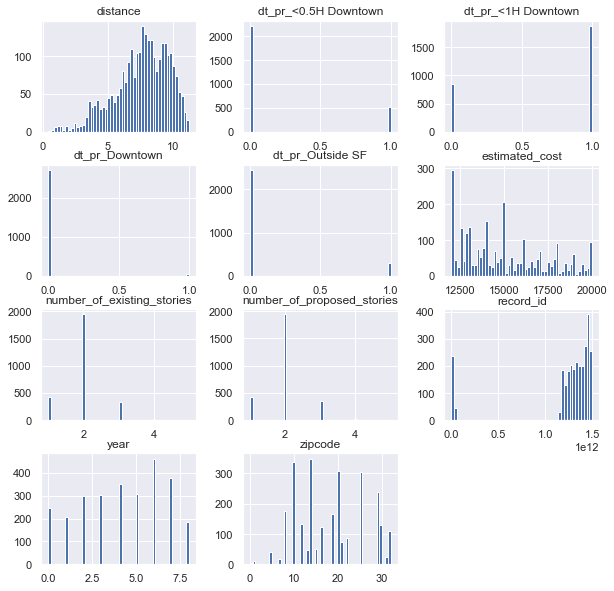

In [75]:
df_pr.hist(bins=50, figsize=(10, 10));

Now we visualize our data using the technique of nonlinear dimensionality reduction and visualization of multidimensional variables. TSNE **


In [76]:
from sklearn.manifold import TSNE
tsne=TSNE(perplexity = 3)
tsne.fit(df_pr)

TSNE(perplexity=3)

**
t-Distributed Stochastic Neighbor Embedding** (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. 

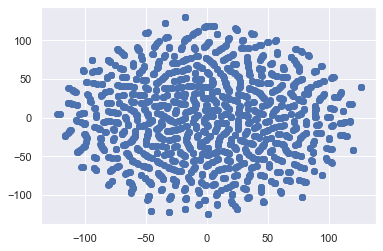

In [77]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1])

* Separate the points, that is, our objects. And we will find projects in which the cost of construction work to create a new roof is more than "$"13,000 = orange and less than 13,000 in blue.

In [78]:
df_pr['proofcost'] = df_pr.estimated_cost.apply(lambda x: True if x>=13000 else False )

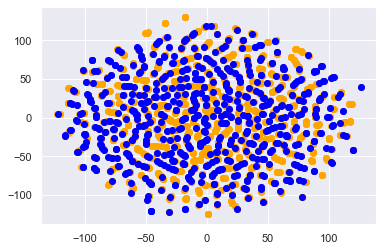

In [79]:
plt.scatter(tsne.embedding_[df_pr.proofcost.values, 0], tsne.embedding_[df_pr.proofcost.values, 1], color='orange')
plt.scatter(tsne.embedding_[~df_pr.proofcost.values, 0], tsne.embedding_[~df_pr.proofcost.values, 1], color='blue')

* Delete the column 'proofcost' we do not need

In [80]:
df_pr = df_pr.drop(columns = 'proofcost')

In [81]:
#df_pr = df_pr.drop(['existing_construction_type'], axis = 1)

# Creating, Training, Evaluating, Validating, and Testing ML Models

Now we can start testing our model. First, we import all the libraries we need from the main sklearn library.

**sklearn** is a Python module integrating classical machine learning algorithms in the tightly-knit world of scientific Python packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems that are accessible to everybody and reusable in various contexts: machine-learning as a versatile tool for science and engineering.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold


**Defining Training/Test Sets**

* divide all our data into training and validation data. In X we will have all the values ​​except the value. And in Y the value is only value.

In [83]:
X_training = df_pr.drop(['estimated_cost'], axis = 1)
y_training = df_pr['estimated_cost']

**Splitting into Validation**

* Using the train_test_split function, we will separate our data regarding 80% training data and 20% validation data.

In [84]:
from sklearn.model_selection import train_test_split #to create validation data set
X_train, X_valid, y_train, y_valid = train_test_split(X_training, y_training, test_size=0.2, random_state=0) 
#X_valid and y_valid are the validation sets

**Linear Regression Model
**

Let's look at the indicators of the model that the Linear Regression module will build for us. 

*  Train our data using the fit function.

Each machine learning algorithm has a basic set of parameters that can be changed to improve its accuracy. During the fitting process, you run an algorithm on data for which you know the target variable, known as “labeled” data, and produce a machine learning model. 

* Compare the outcomes to real, observed values of the target variable to determine their accuracy.

Then we predict based on our new cost model for the validation data frame X_valid. And we compare our obtained data with the initial data y_valid, calculating the determination coefficient for these values ​​and the standard deviation - the RMSE coefficient.

R2 = 1 - sum of (valid value for each row - prediction) ^ 2 / sum of (valid value for each prediction - mean) ^ 2
RMSE = sqrt (np.mean (np.square (y - y_pred)))

We got the value of RMSE = 2000 dollar.
Those. When predicting the value using linear regression, our accuracy will be + + - 2000 dollar.
We can also see that due to the lack of important parameters in calculating the value, we obtained small values ​​of the determination coefficient near zero. This means that, now the forecasts do not match the actual values.



In [85]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: -0.004791541872189331
RMSE Score: 2347.219551269063


Try to predict the "estimated cost" for arbitrary parameters. Here I took an arbitrary zip code, and arbitrary values ​​for the rest as a parameter, and got values ​​with an accuracy of + - $ 2000.

In [86]:
df_pr.columns

Index(['zipcode', 'number_of_existing_stories', 'number_of_proposed_stories',
       'record_id', 'estimated_cost', 'distance', 'year',
       'dt_pr_<0.5H Downtown', 'dt_pr_<1H Downtown', 'dt_pr_Downtown',
       'dt_pr_Outside SF'],
      dtype='object')

In [87]:
df_pr.sample(1)

,zipcode,number_of_existing_stories,number_of_proposed_stories,record_id,estimated_cost,distance,year,dt_pr_<0.5H Downtown,dt_pr_<1H Downtown,dt_pr_Downtown,dt_pr_Outside SF
286566,20.0,2.0,2.0,1460384226726,19800.0,7.720253,7,0,1,0,0


In [88]:
lin_pred = linreg.predict([[20.0, #zipcode
                            3.0, #number_of_proposed_stories
                            4.0, #record_id
                            1163316512454, #record_id
                            4.825703, #distance
                            0, #year
                            0, #dt_pr_<0.5H Downtown
                            0, #dt_pr_Downtown
                            0, #dt_pr_Outside SF
                            1]]) #dt_pr_Outside SF

In [89]:
print("Prediction for data with arbitrary values: " + str(lin_pred[0]))

Prediction for data with arbitrary values: 14565.47741621258


We do the same for other regressors: DecisionTreeRegressor.

In [90]:

linsvc = DecisionTreeRegressor()
linsvc.fit(X_train, y_train)
lin_pred = linsvc.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))


R^2 Score: -1.0328382099165991
RMSE Score: 3338.621119480787


In [91]:
linsvc = linsvc.predict([[20.0, 3.0, 4.0, 1163316512454, 4.825703, 0, 0, 0, 0, 1]])
print("Prediction for data with arbitrary values: " + str(linsvc[0]))

Prediction for data with arbitrary values: 16500.0


**Decision Tree Regressor Model**

Here, when training the model, we use standard hyperparameters. In order to configure these hyperparameters and to search for the best parameters specifically for our data, we will use GridSearchCV

GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.
In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.


In [92]:
dtr = DecisionTreeRegressor()
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtr, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_train, y_train)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(max_features='log2', min_samples_split=10,
                      splitter='random')
Best Score: -0.18962020145281402


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   10.0s finished


In [93]:
dtr = grid_dtr.best_estimator_
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: -0.2947794915686366
RMSE Score: 2664.487177603891


In [94]:
#scores_dtr = cross_val_score(dtr, X_train, y_train, cv=10, scoring="r2")
#print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Next, we will test the model using the following other machine algorithms: Random Forest Regressor, Lasso, Ridge.

In [95]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: -0.1078349946863908
RMSE Score: 2464.638728320798


In [96]:
scores_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: -0.07201383687011745


In [97]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_valid)
r2_lasso = r2_score(y_valid, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_valid, lasso_pred))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

R^2 Score: -0.00458586241012271
RMSE Score: 2346.9793026488737


In [98]:
scores_lasso = cross_val_score(lasso, X_train, y_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lasso)));

Cross Validation Score: 0.003175423000502531


C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5382595274.88099, tolerance: 1094714.0075691422
  model = cd_fast.enet_coordinate_descent(


In [99]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: -0.004819669249818581
RMSE Score: 2347.252404187263


C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70276e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [100]:
scores_ridge = cross_val_score(ridge, X_train, y_train, cv=10, scoring="r2");
print("Cross Validation Score: " + str(np.mean(scores_ridge)));

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93897e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Cross Validation Score: 0.0019551589925878576


C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.05245e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07382e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90406e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.01628e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06873e-27): result may not be acc

The obtained data on the coefficient of determination R ^ 2 and the standard error are written in the general resulting table. We see that the best results show Lasso algorithm.


In [101]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor","Ridge", "Lasso"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_dtr)[0:5], str(r2_rf)[0:5], str(r2_ridge)[0:5], str(r2_lasso)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_dtr)[0:8], str(rmse_rf)[0:8], str(rmse_ridge)[0:8], str(rmse_lasso)[0:8]]
})
model_performances.round(4)

,Model,R Squared,RMSE
0,Linear Regression,-1.03,3338.621
1,Decision Tree Regressor,-0.29,2664.487
2,Random Forest Regressor,-0.10,2464.638
3,Ridge,-0.00,2347.252
4,Lasso,-0.00,2346.979


In [102]:
X_train_v = X_train.values
y_train_v = y_train.values

In [103]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(dtr_pred, out_file='tree.dot', feature_names = X_train.columns, filled = True)
!dot -Tpng tree.dot -o tree.png -Gdpi = 600
from IPython.display import Image
Image(filename = 'tree.png' )

# Model Building
We have dealt with the categorical columns and the date values. We have also taken care of the missing values. Now we can finally power up and build the DecisionTree model we have been inching towards.

In [104]:
"""
X = df_pr.drop(['estimated_cost'], axis = 1).values
y = df_pr['estimated_cost'].values


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = .3, random_state=0)
"""

"\nX = df_pr.drop(['estimated_cost'], axis = 1).values\ny = df_pr['estimated_cost'].values\n\n\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = .3, random_state=0)\n"

In [105]:
"""
y_df = df_pr['estimated_cost']
X_df = df_pr.drop(['estimated_cost'], axis = 1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=5)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)
"""

"\ny_df = df_pr['estimated_cost']\nX_df = df_pr.drop(['estimated_cost'], axis = 1)\n\n\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=5)\nfrom sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression(max_iter = 500000)\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\naccuracy = model.score(X_test, y_test)\nprint(accuracy)\n"

In [106]:
"""
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import Ridge\nfrom sklearn.metrics import mean_squared_error\n\nridge=Ridge()\nparameters= {\'alpha\':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}\n\nridge_reg=GridSearchCV(ridge, param_grid=parameters)\nridge_reg.fit(X_train,Y_train)\nprint("The best value of Alpha is: ",ridge_reg.best_params_)\n'

In [107]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_pr, y)
m.score(df_pr,y)

0.9999995280209489

The n_jobs is set to -1 to use all the available cores on the machine. This gives us a score (r^2) of 0.99, which is excellent. The caveat here is that we have trained the model on the training set, and checked the result on the same. There’s a high chance that this model might not perform as well on unseen data (test set, in our case).

The only way to find out is to create a validation set and check the performance of the model on it. So let’s create a validation set and the train set will contain the rest.

In [108]:
y_df = df_pr['estimated_cost']
X_df = df_pr.drop(['estimated_cost'], axis = 1)

def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = int(len(df_pr)*0.25)  # same as Kaggle's test set size
n_trn = len(df_pr)-n_valid
#raw_train, raw_valid = split_vals(X_df, n_trn)
X_train, X_valid = split_vals(X_df, n_trn)
y_train, y_valid = split_vals(y_df, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((2052, 10), (2052,), (683, 10))

Here, we will train the model on our new set (which is a sample of the original set) and check the performance across both – train and validation sets.

In [109]:
import math 
#define a function to check rmse value
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In order to compare the score against the train and test sets, the below function returns the RMSE value and score for both datasets.

In [110]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

The result of the above code is shown below. The train set has a score of 0.99, while the validation set has a score of 0.99.

In [111]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 305 ms
[898.387898380475, 2667.2184191023407, 0.8493324200122018, -0.15519178640130393]


# Creating a Validation set
Creating a good validation set that closely resembles the test set is one of the most important tasks in machine learning. The validation score is representative of how our model performs on real-world data, or on the test data.

Keep in mind that if there’s a time component involved, then the most recent rows should be included in the validation set. So, our validation set will be of the same size as the test set (last 25% rows from the training data).

In [112]:
def split_vals(a,n):
   return a[:n].copy(), a[n:].copy()

n_valid = int(len(df_pr)*0.25)  
n_trn = len(df_pr)-n_valid

raw_train, raw_valid = split_vals(df_pr, n_trn)
X_train, X_valid = split_vals(X_df, n_trn)
y_train, y_valid = split_vals(y_df, n_trn)

The data points from 0 to (length – 25%) are stored as the train set (x_train, y_train). A model is built using the train set and its performance is measured on both the train and validation sets as before.

In [113]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[901.4477248358041, 2641.9858129712634, 0.8483043524298937, -0.13343832008688183]


From the above code, we get the results:

* RMSE on the validation set
* R-square on validation set

In [114]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 42) 
dt_model.fit(train_X, train_Y)

NameError: name 'train_X' is not defined

In [115]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2266.6264764546613, 2532.2496317924433, 0.04092638954332506, -0.041237887554893105]


In [116]:
draw_tree(m.estimators_[0], df_trn, precision=3)


NameError: name 'draw_tree' is not defined

In [117]:
y_pred = dt_model.predict([[116,2.0,1.0,5.0,10.0,81.0,9.781119,0,1,0,0,1,0,0]])
print(y_pred)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [118]:
Y_pred = dt_model.predict(validation_X)

NameError: name 'validation_X' is not defined

In [119]:
s = pd.Series(Y_pred)
validation_Y.reindex()
df = pd.concat([s.reset_index(drop=True), validation_Y.reset_index(drop=True)], axis=1, ignore_index=True)
df.tail(15)

NameError: name 'Y_pred' is not defined

In [120]:
Y = df_pr.estimated_cost
X = df_pr.drop(['estimated_cost'], axis = 1)

from sklearn.model_selection import train_test_split
train_X, validation_X, train_Y, validation_Y = train_test_split(X, Y, random_state = 42)

print("Training set: Xt:{} Yt:{}".format(train_X.shape, train_Y.shape)) 
print("Validation set: Xv:{} Yv:{}".format(validation_X.shape, validation_Y.shape)) 
print("-") 
print("Full dataset: X:{} Y:{}".format(X.shape, Y.shape))

Training set: Xt:(2051, 10) Yt:(2051,)
Validation set: Xv:(684, 10) Yv:(684,)
-
Full dataset: X:(2735, 10) Y:(2735,)


In [121]:
from sklearn.metrics import accuracy_score
score = accuracy_score(validation_Y, Y_pred)
print(score)

NameError: name 'Y_pred' is not defined

In [122]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42) 
model.fit(train_X, train_Y)


DecisionTreeRegressor(random_state=42)

In [123]:
from sklearn.metrics import mean_absolute_error

# instruct our model to make predictions for the prices on the validation set 
validation_predictions = model.predict(validation_X)

# calculate the MAE between the actual prices (in validation_Y) and the predictions made 
validation_prediction_errors = mean_absolute_error(validation_Y, validation_predictions)

validation_prediction_errors

2573.2023830409357

In [124]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state=17, shuffle=True)

In [125]:
features_for_trees=['street_number', 'number_of_existing_stories', 'existing_units',
       'existing_construction_type', 'zipcode', 'sf_find_neighborhoods',
       'distance', 'year', 'existing_use_1 family dwelling',
       'existing_use_2 family dwelling', 'dt_pr_<0.5H Downtown',
       'dt_pr_<1H Downtown', 'dt_pr_Downtown', 'dt_pr_Outside SF']

In [126]:
TOTAL = df_pr.count()[0] 
N_VALID = 0.25 # Three months 
TRAIN = int(TOTAL*N_VALID)
df_small = df_pr
features = ['street_number', 'number_of_existing_stories', 'existing_units',
       'existing_construction_type', 'zipcode', 'sf_find_neighborhoods',
       'distance', 'year', 'existing_use_1 family dwelling',
       'existing_use_2 family dwelling', 'dt_pr_<0.5H Downtown',
       'dt_pr_<1H Downtown', 'dt_pr_Downtown', 'dt_pr_Outside SF']
df_pr
y_df = df_small['estimated_cost']
X_train, X_val = X_df[:TRAIN], X_df[TRAIN:]
y_train, y_val = y_df[:TRAIN], y_df[TRAIN:]
#define a function to check rmse value
import  math 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_val), y_val),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)


In [127]:
model = RandomForestRegressor(n_estimators=40, bootstrap=True, min_samples_leaf=25)
model.fit(X_train, y_train)
#draw_tree(model.estimators_[0], X_train, precision=2)
print_score(model)

[2141.7409120948855, 2409.5912069909764, 0.11818062564916909, -0.027025266456273567]


In [128]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#training_scores_encoded = lab_enc.fit_transform(df_pr.estimated_cost)
#print(training_scores_encoded)


y = df_pr.estimated_cost
X = df_pr.drop(['estimated_cost'], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.25, random_state = 17)
X.shape, y.shape


((2735, 10), (2735,))

In [129]:
"""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score




ml_arr =[SVC(), GaussianNB(), Perceptron(), SGDClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]


for el in ml_arr:
    el.fit(X_train, y_train)
    Y_pred = el.predict(X_valid)
    Y_pred.reshape(-1, 1)
    #Y_pred = lab_enc.fit_transform(Y_pred)
    #acc = round(el.score(y_valid, Y_pred) * 100, 2)
    score = accuracy_score(y_valid, Y_pred)
    print(score)
"""

'\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC, LinearSVC\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.linear_model import Perceptron\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n\n\n\nml_arr =[SVC(), GaussianNB(), Perceptron(), SGDClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]\n\n\nfor el in ml_arr:\n    el.fit(X_train, y_train)\n    Y_pred = el.predict(X_valid)\n    Y_pred.reshape(-1, 1)\n    #Y_pred = lab_enc.fit_transform(Y_pred)\n    #acc = round(el.score(y_valid, Y_pred) * 100, 2)\n    score = accuracy_score(y_valid, Y_pred)\n    print(score)\n'

In [130]:
# using scaled data
X=pd.concat([train_df[dummies_names], X_train_scaled[numerical_features]], axis=1, ignore_index = True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

NameError: name 'train_df' is not defined

# 8 Cross-validation and adjustment of model hyperparameters

Let's prepare cross validation samples. As far as there are not a lot of data we can easily divide it on 10 folds, that are taken from shuffled train data. Within every split we will train our model on 90% of train data and compute CV metric on the other 10%.

We fix the random state for the reproducibility.

In [131]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state=17, shuffle=True)

In [132]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=1)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

2353.0222015800423
